In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:

notif = pd.read_csv ('/content/drive/My Drive/pf-ds-coh-team1-master(1)/pf-ds-coh-team1-master/data/notifications.csv')



In [8]:
notif.keys()

Index(['reason', 'channel', 'status', 'user_id', 'created_date'], dtype='object')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [10]:
notif.dtypes

reason          object
channel         object
status          object
user_id         object
created_date    object
dtype: object

In [11]:
notif.count()

reason          97704
channel         97704
status          97704
user_id         97704
created_date    97704
dtype: int64

In [12]:
# Finding the null values.
print(notif.isnull().sum())

reason          0
channel         0
status          0
user_id         0
created_date    0
dtype: int64


In [13]:
notif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97704 entries, 0 to 97703
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reason        97704 non-null  object
 1   channel       97704 non-null  object
 2   status        97704 non-null  object
 3   user_id       97704 non-null  object
 4   created_date  97704 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [14]:
### categorical
cat_not = notif.select_dtypes(include=['object'])
cat_not

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574
...,...,...,...,...,...
97699,LOST_CARD_ORDER,EMAIL,FAILED,user_7488,2019-05-05 11:29:47.645713
97700,LOST_CARD_ORDER,EMAIL,SENT,user_7108,2019-05-06 08:17:29.915656
97701,LOST_CARD_ORDER,EMAIL,FAILED,user_5079,2019-05-06 13:35:51.055711
97702,LOST_CARD_ORDER,EMAIL,SENT,user_4860,2019-05-10 01:25:42.530159


In [15]:
cat_not.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574


In [0]:
notifications = cat_not.drop(cat_not.columns[[3,4]], axis=1)

In [0]:
#remove underscore from REASON

def remove_underscore (text):
  text= text.replace('_', ' ')
  return text
notifications.reason = notifications.reason.apply(remove_underscore)



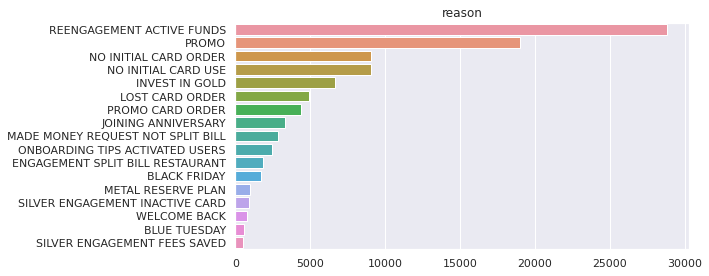

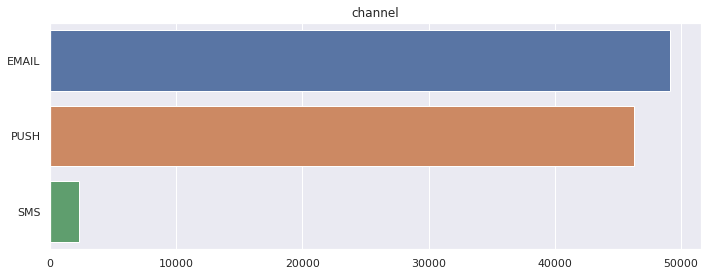

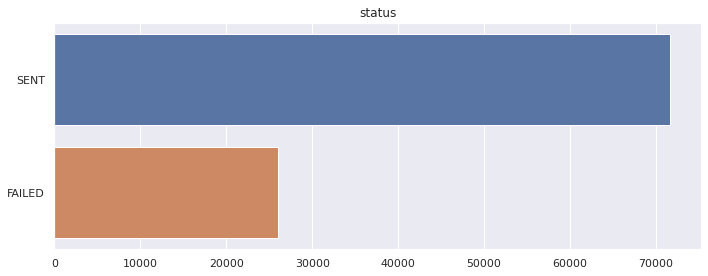

In [18]:
for col in notifications:
    plt.figure(figsize=(10,4))
    sns.barplot(notifications[col].value_counts().values, notifications[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

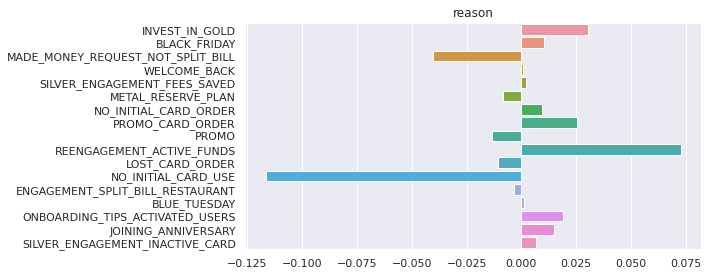

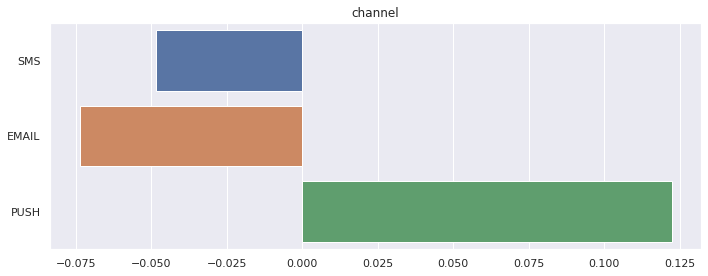

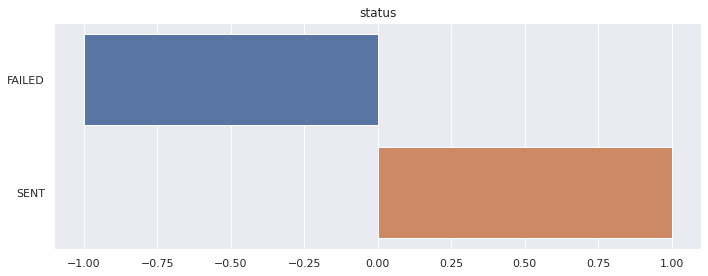

In [21]:
for col in notifications:
    plt.figure(figsize=(10,4))
    #The value_counts() function is used to get a Series containing counts of unique values.
    sent_counts = notif.loc[notif.status.values == 'SENT', col].value_counts() 
    failed_counts = notif.loc[notif.status.values == 'FAILED', col].value_counts()
    
    all_counts = list(set(list(sent_counts.index) + list(failed_counts.index)))
    
    #poses fores emfanizetai to send failed
    freq_sent = (notif.status.values == 'SENT').sum()
    freq_failed = (notif.status.values == 'FAILED').sum()
    
    sent_counts = sent_counts.to_dict()
    failed_counts = failed_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [sent_counts.get(k, 0) / freq_sent - failed_counts.get(k, 0) / freq_failed for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()
    

In [22]:
notifications['reason'].unique()

array(['REENGAGEMENT ACTIVE FUNDS', 'BLUE TUESDAY', 'NO INITIAL CARD USE',
       'ENGAGEMENT SPLIT BILL RESTAURANT', 'METAL RESERVE PLAN',
       'ONBOARDING TIPS ACTIVATED USERS',
       'MADE MONEY REQUEST NOT SPLIT BILL',
       'SILVER ENGAGEMENT INACTIVE CARD', 'NO INITIAL CARD ORDER',
       'SILVER ENGAGEMENT FEES SAVED', 'PROMO', 'WELCOME BACK',
       'PROMO CARD ORDER', 'LOST CARD ORDER', 'BLACK FRIDAY',
       'INVEST IN GOLD', 'JOINING ANNIVERSARY'], dtype=object)

**Unique values Reason**

---
REENGAGEMENT_ACTIVE_FUNDS

WELCOME_BACK


---



BLUE_TUESDAY


---



MADE_MONEY_REQUEST_NOT_SPLIT_BILL

ENGAGEMENT_SPLIT_BILL_RESTAURANT


---


METAL_RESERVE_PLAN

INVEST_IN_GOLD


---


ONBOARDING_TIPS_ACTIVATED_USERS

NO_INITIAL_CARD_ORDER

NO_INITIAL_CARD_USE


---




SILVER_ENGAGEMENT_INACTIVE_CARD

SILVER_ENGAGEMENT_FEES_SAVED


---



LOST_CARD_ORDER



---


PROMO

BLACK_FRIDAY

JOINING_ANNIVERSARY

PROMO_CARD_ORDER










